# Problem Statement

In this assignment students have to make ARIMA model over shampoo
sales data and check the MSE between predicted and actual value.
Student can download data in .csv format from the following link:

https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-three-year-period#!ds=22r0&display=line

Hint:
Following is the command import
packages and data

predicted=349.117698, expected=342.300000
predicted=306.513018, expected=339.700000
predicted=387.376388, expected=440.400000
predicted=348.154169, expected=315.900000
predicted=386.308824, expected=439.300000
predicted=356.081993, expected=401.300000
predicted=446.379462, expected=437.400000
predicted=394.737280, expected=575.500000
predicted=434.915365, expected=407.600000
predicted=507.923393, expected=682.000000
predicted=435.482931, expected=475.300000
predicted=652.743811, expected=581.300000
predicted=546.343450, expected=646.900000
Test MSE: 6958.327


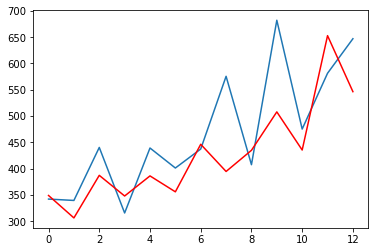

In [1]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast() 
    predictions.append(output[0])
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (output[0], obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()